# Import Packages and Program Summary

In [1]:
#Source code used for much of the project
#http://www.cs.colostate.edu/~anderson/wp/2017/10/13/comparison-of-fitting-a-polynomial-to-data-with-numpy-pytorch-and-autograd-on-cpu-and-gpu/#Now,-with-Pytorch
'''Code takes csv data and trains a model which uses a polynomial to find compute mean squared error loss'''

# Import packages

import torch
from torch import *
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import pandas as pd
import numpy as np

import sympy

import time

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# Read In and View Data

In [2]:
#Read data with Pandas, r converts the normal string to a raw string
train_data = pd.read_csv(r'C:\Users\Trevor\Documents\WPI\Machine Learning- Paffenroth\5 Data Points.csv')

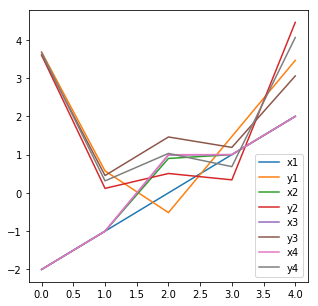

In [3]:
#Plot dataframe
train_data.plot(figsize=(5, 5))

In [4]:
#Shows begining of data in a pretty format
train_data.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,-2,3.680,-2.0,3.5970,-2.00,3.6070,-2.000,3.6690
1,-1,0.574,-1.0,0.1180,-1.00,0.4539,-1.000,0.3139
2,0,-0.514,0.9,0.5070,0.99,1.4611,0.999,1.0310
3,1,1.474,1.0,0.3409,1.00,1.1890,1.000,0.6860
4,2,3.463,2.0,4.4560,2.00,3.0560,2.000,4.0610


# Convert Data to Pytorch Tensors

In [5]:
#Convert pandas data to numpy arrays
x2_array = train_data['x2'].values
y2_array = train_data['y2'].values

x3_array = train_data['x3'].values
y3_array = train_data['y3'].values

In [6]:
#Define varial for setting tensor datatype
dtype = torch.FloatTensor

In [7]:
#Create tensors from arrays
ten_x2 = torch.from_numpy(x2_array).type(dtype)
ten_y2 = torch.from_numpy(y2_array).type(dtype)

ten_x3 = torch.from_numpy(x3_array).type(dtype)
ten_y3 = torch.from_numpy(y3_array).type(dtype)

print("ten_y2:", ten_y2)

ten_y2: tensor([3.5970, 0.1180, 0.5070, 0.3409, 4.4560])


# Define Model

In [8]:
#Define polynomial parameters
#xi = np.linspace(-5, 5, 20).reshape((-1,1))
x2 = x2_array.reshape((-1,1))
x2_t = ten_x2.reshape((-1,1))
y2_t = ten_y2.reshape((-1,1))

nSamples = len(x2)

degree = 4

# learnRate = 0.001 

coef = np.zeros((degree+1, 1))
coef_t = torch.zeros((degree+1, 1)).type(dtype)
#coef_t = torch.rand((degree+1, 1)).type(dtype)

In [9]:
#Define polynomial as tensor
def poly_torch(x2, coef):
    ''' poly(x2,w), where x2 is Nx1 samples and w is 1xD+1 coefficients for xi^0, xi^1, ..., xi^D'''
    # D = w.size
    D = coef.shape[0]
    x2Powers = x2 ** torch.arange(0.0, D)
    # return xiPowers @ coef
    return x2Powers.mm(coef)

In [10]:
#Function to apply gradient to

# No changes needed from dpoly
def dpoly_dw_torch(x2, coef):
    D = coef.shape[0]
    x2Powers = x2 ** torch.arange(0.0, D)
    return x2Powers

# Train Model

In [11]:
startTime = time.time()

nSteps = 200000
learnRate = 0.00001 
degree = 4

# w = np.zeros((degree+1, 1))
#w_torch = torch.zeros((degree+1, 1)).type(dtype)

# mseTrace = np.zeros(nSteps)
mseTrace = torch.zeros(nSteps)
nSamples = x2_t.shape[0]

for step in range(nSteps):
    
    # yModel = poly(x, w)
    # grad = -2/nSamples * dpoly(x, w).T @ (y - yModel)
    yModel = poly_torch(x2_t, coef_t)
    grad = -2/nSamples * dpoly_dw_torch(x2_t, coef_t).t().mm(y2_t - yModel)
    coef_t -= learnRate * grad

    if step == 0:
        print('First step gradient:')
        print(grad)
 
    
    mse = ((y2_t - yModel)**2).mean()
    mseTrace[step] = mse
    
print('Pytorch took {} seconds'.format(time.time()-startTime))

First step gradient:
tensor([[ -3.6076],
        [ -0.9589],
        [-13.2326],
        [ -2.9858],
        [-51.8558]])
Pytorch took 52.77901864051819 seconds


# View Outputs and Plots

In [12]:
print("coef_t", coef_t)
print("yModel", yModel)

coef_t tensor([[0.0263],
        [0.1154],
        [0.0503],
        [0.0255],
        [0.2373]])
yModel tensor([[3.5900],
        [0.1731],
        [0.3451],
        [0.4547],
        [4.4587]])


[[3.5900283 ]
 [0.17309612]
 [0.34512782]
 [0.45472428]
 [4.458703  ]]
(5, 1)


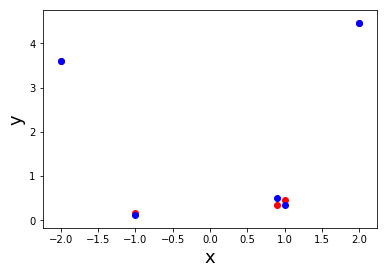

In [15]:
#Scatterplot
input_array = x2_array
final_pred = yModel.detach().numpy()
y_true = y2_array

print(final_pred)
print(final_pred.shape)


plt.scatter(input_array, final_pred, color = "red")
plt.scatter(input_array, y_true, color = "blue")
#plt.scatter(input_array, pred_y, color = "green")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)

plt.show()

coefficient a: 0.2373085469007492
y_x_sol = 0.237308546900749*x**4 + 0.0254514422267675*x**3 + 0.0502756871283054*x**2 + 0.115362837910652*x + 0.0263258889317513


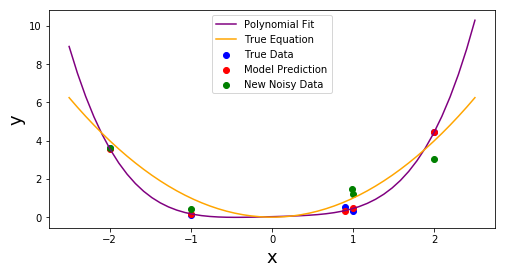

In [14]:
#Plot Data and Polynomial predictions

coef_n = coef_t.detach().numpy()

# a = float(y2_arr[0])
# b = float(y2_arr[1])
# c = float(y2_arr[2])
# d = float(y2_arr[3])
# e = float(y2_arr[4])

a = float(coef_n[4])
b = float(coef_n[3])
c = float(coef_n[2])
d = float(coef_n[1])
e = float(coef_n[0])

print("coefficient a:", a)

fig, ax = plt.subplots(figsize=(8,4))
tt = np.linspace(-2.5, 2.5, 50)

#Convert x to a sympy symbol
x = sympy.symbols("x")


y_x_sol = a*(x**4) + b*(x**3) + c*(x**2) + d*(x**1) + e

print("y_x_sol =", y_x_sol)

y_x = sympy.lambdify(x, y_x_sol,'numpy')

y_x_t = x**2
y_x_t = sympy.lambdify(x, y_x_t,'numpy')

ax.plot(tt, y_x(tt).real, color = "purple", label='Polynomial Fit')
ax.plot(tt, y_x_t(tt).real, color = "orange", label='True Equation')
plt.scatter(input_array, y_true, color = "blue", label='True Data')
plt.scatter(input_array, final_pred, color = "red", label='Model Prediction')
plt.scatter(x3_array, y3_array, color = "green", label='New Noisy Data')
#plt.scatter(x_arr,y_arr)
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.legend()
#plt.plot(y2_arr, color="red")
plt.show()